# Brownian bridge

## 1. Diffusion model

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

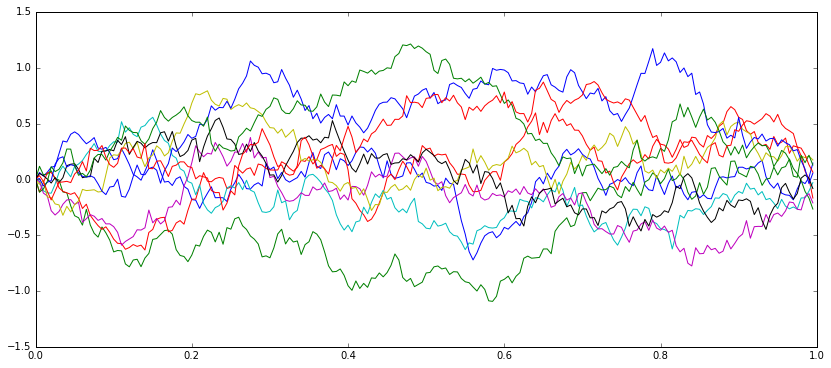

In [56]:
#seed = 0
#np.random.seed(seed)
n_samples = 200
n_traj = 10
tf = 1

def diffusion_model_sampling(n_traj, n_samples):
    dt = tf / n_samples
    B = np.empty((n_traj, n_samples), dtype=np.float32)
    B[:, 0] = 0
    for i in range(n_samples - 1):
        t = i * dt
        Z = np.random.randn(n_traj) * np.sqrt(dt)
        B[:, i + 1] = B[:, i] * (1 - dt / (1 - t)) + Z
    return B

plt.figure(1, figsize=(14, 6))
B = diffusion_model_sampling(n_traj, n_samples)
t = np.matlib.repmat(np.arange(0, tf, tf / n_samples),n_traj,1)
plt.plot(t.T,B.T)
plt.show()

## 2. Matrix model

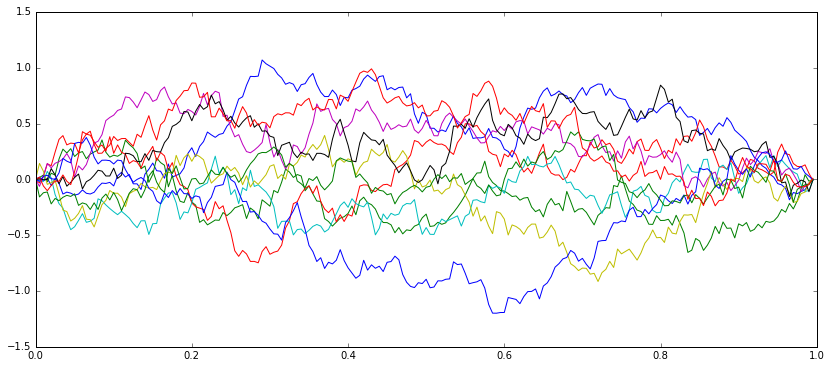

In [53]:
#seed = 0
#np.random.seed(seed)
n_samples = 200
n_traj = 10
tf = 1


def brownian_difference_sampling(n_traj, n_samples):
    dt = tf / n_samples
    B = np.empty((n_traj, n_samples), dtype=np.float32)
    B[:, 0] = 0
    for i in range(n_samples - 1):
        t = i * dt
        Z = np.random.randn(n_traj) * np.sqrt(dt)
        B[:, i + 1] = B[:, i] + Z
    brownian_bridge = np.empty((n_traj, n_samples), dtype=np.float32)
    for i in range(n_samples):
        t = i * dt
        brownian_bridge[:,i] = B[:, i] - (t * B[:, n_samples-1])/tf
    return brownian_bridge

plt.figure(1, figsize=(14, 6))
B = brownian_difference_sampling(n_traj, n_samples)
t = np.matlib.repmat(np.arange(0, tf, tf / n_samples),n_traj,1)
plt.plot(t.T,B.T)
plt.show()